In [232]:
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True)
np.set_printoptions(precision=15)

def readFile(fileName):
    data = np.genfromtxt(fileName, delimiter=',')
    data = np.delete(data, 0, axis = 0)
    data = np.delete(data, 0, axis = 1)
    return data

[[ 0.                20.14901424590337 ]
 [ 0.01010101010101  19.978722729850666]
 [ 0.02020202020202  20.234710601834248]
 [ 0.03030303030303  20.51751501752847 ]
 [ 0.04040404040404  20.010562068391078]
 [ 0.050505050505051 20.030769013925347]
 [ 0.060606060606061 20.59497596586434 ]
 [ 0.070707070707071 20.371644560160014]
 [ 0.080808080808081 20.020773845835677]
 [ 0.090909090909091 20.344586194893974]
 [ 0.101010101010101 20.062994894176462]
 [ 0.111111111111111 20.082503296151145]
 [ 0.121212121212121 20.315012923894052]
 [ 0.131313131313131 19.688642189228922]
 [ 0.141414141414141 19.765352933074375]
 [ 0.151515151515152 20.13434404425801 ]
 [ 0.161616161616162 20.019382987131994]
 [ 0.171717171717172 20.437708543212924]
 [ 0.181818181818182 20.09122914098    ]
 [ 0.191919191919192 19.960147273437798]
 [ 0.202020202020202 20.84373503471687 ]
 [ 0.212121212121212 20.356509534096464]
 [ 0.222222222222222 20.46470290585082 ]
 [ 0.232323232323232 20.037222008782425]
 [ 0.24242424242

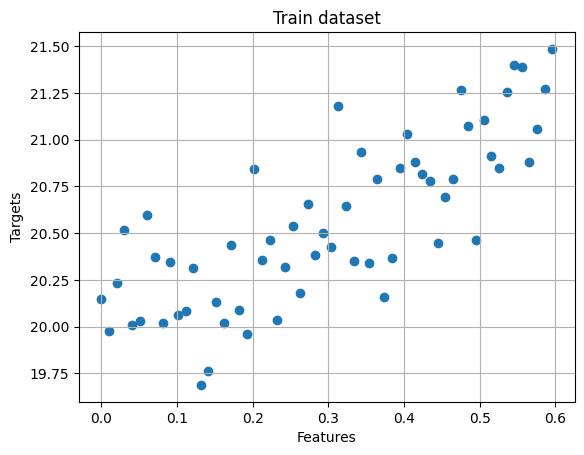

In [233]:
trainData = readFile("lab_1_train.csv")
print(trainData)

plt.scatter(trainData[:, 0], trainData[:, 1])
plt.title("Train dataset")
plt.xlabel("Features")
plt.ylabel("Targets")
plt.grid()

plt.show()

In [234]:
# MSE: J(b0, b1) = 1 / m * ( sum( (yi - yi`)^2 ) )  
def costFunction(b0, b1, data):
    cost = 1 / data.shape[0]
    
    squareDiff = np.array([(data[i, 1] - linearRegression(b0, b1, data[i, 0])) ** 2 for i in range(data.shape[0])])
        
    cost *= squareDiff.sum()
    return cost;


# h(x) = b0 + b1 * x
def linearRegression(b0, b1, x):
    return b0 + b1 * x

In [235]:
def gradientDescent(data):
    tolerance = 10 ** -6
    learnRate = 0.01
    
    b0 = np.random.uniform(0, 1)
    b1 = np.random.uniform(0, 1)
    
    currentCost = costFunction(b0, b1, data)
    previousCost = np.max(data)
    delta = abs(previousCost - currentCost)
    
    counter = 0
    while (delta > tolerance):
        b0Derivative = np.array([data[i, 1] - linearRegression(b0, b1, data[i, 0]) for i in range(data.shape[0])])
        b1Derivative = np.array([b0Derivative[i] * data[i, 0] for i in range(data.shape[0])])
        b0Derivative = -2 / data.shape[0] * b0Derivative.sum()
        b1Derivative = -2 / data.shape[0] * b1Derivative.sum()
        
        #bj = bj - derivative (dJ(b0, b1) / d (bj)) = bj - ( 2 * (-1) / m * [sum (yi - yi`) * Xji])
        b0 = b0 - learnRate * b0Derivative
        b1 = b1 - learnRate * b1Derivative
        
        previousCost = currentCost
        currentCost = costFunction(b0, b1, data)
        delta = abs(previousCost - currentCost)

        print(f"{counter}\tb0: {b0}, b1: {b1}, costFunction = {currentCost}")
        counter += 1
        
    return (b0, b1, currentCost)


In [236]:
(b0, b1, cost) = gradientDescent(trainData)

0	b0: 1.0235015058445471, b1: 0.3340374937263996, costFunction = 377.5456993740088
1	b0: 1.4120320110504596, b1: 0.4508183409840795, costFunction = 361.26595202740884
2	b0: 1.792095939486779, b1: 0.5650048480821432, costFunction = 345.68910607137684
3	b0: 2.16387808390803, b1: 0.6766536672965472, costFunction = 330.7848118524974
4	b0: 2.527559203588972, b1: 0.7858202143358676, costFunction = 316.52403014605545
5	b0: 2.883316112363637, b1: 0.8925586953319502, costFunction = 302.87897557471854
6	b0: 3.231321764742731, b1: 0.9969221332414321, costFunction = 289.8230624702687
7	b0: 3.571745340151348, b1: 1.0989623936709965, costFunction = 277.3308530729046
8	b0: 3.9047523253280203, b1: 1.1987302101389374, costFunction = 265.37800796717534
9	b0: 4.23050459492524, b1: 1.296275208785339, costFunction = 253.94123865798122
10	b0: 4.549160490350702, b1: 1.3916459325429034, costFunction = 242.99826219423238
11	b0: 4.860874896887686, b1: 1.4848898647802002, costFunction = 232.52775775175482
12	b0:

3412	b0: 19.787943005961097, b1: 2.5397626108778475, costFunction = 0.08268821205187854
3413	b0: 19.788039450668524, b1: 2.539448024181828, costFunction = 0.08267738845048488
3414	b0: 19.788135841291403, b1: 2.5391336139006584, costFunction = 0.08266657698506928
3415	b0: 19.788232177860067, b1: 2.538819379935409, costFunction = 0.08265577764202436
3416	b0: 19.788328460404827, b1: 2.5385053221872047, costFunction = 0.08264499040775795
3417	b0: 19.78842468895598, b1: 2.5381914405572257, costFunction = 0.08263421526869286
3418	b0: 19.788520863543805, b1: 2.5378777349467083, costFunction = 0.08262345221126743
3419	b0: 19.788616984198562, b1: 2.5375642052569436, costFunction = 0.08261270122193495
3420	b0: 19.788713050950495, b1: 2.537250851389278, costFunction = 0.0826019622871645
3421	b0: 19.788809063829834, b1: 2.5369376732451134, costFunction = 0.08259123539343936
3422	b0: 19.78890502286679, b1: 2.5366246707259075, costFunction = 0.08258052052725876
3423	b0: 19.789000928091554, b1: 2.536

In [237]:
print(f"Final weights: b0 = {b0}, b1 = {b1}; \nCost: {cost}")

testData = readFile("lab_1_test.csv")
print(f"\nCost for test dataset: {costFunction(b0, b1, testData)}")


Final weights: b0 = 19.90767972784988, b1 = 2.1492012131993556; 
Cost: 0.07392590784207582

Cost for test dataset: 0.07538679795910745


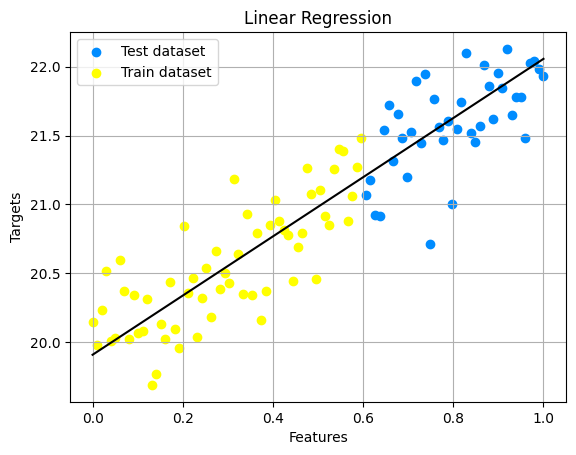

In [238]:
plt.scatter(testData[:, 0], testData[:, 1], color = "#008cff", label = "Test dataset")
plt.scatter(trainData[:, 0], trainData[:, 1], color = "yellow", label = "Train dataset")
plt.plot([0, 1], [linearRegression(b0, b1, 0), linearRegression(b0, b1, 1)], color = "black")

plt.legend()
plt.title("Linear Regression")
plt.xlabel("Features")
plt.ylabel("Targets")
plt.grid()

plt.show()